## V02

This version looks at baseline model output by minimizing data processing to default `CountVectorizer()`.

In [3]:
# all imports and magic commands
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from my_measures import BinaryClassificationPerformance
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from scipy.sparse import csr_matrix, hstack
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
%matplotlib inline

### IMPORTANT!!! Make sure you are using `BinaryClassificationPerformance` v1.02

In [2]:
help(BinaryClassificationPerformance)

Help on class BinaryClassificationPerformance in module my_measures:

class BinaryClassificationPerformance(builtins.object)
 |  BinaryClassificationPerformance(predictions, labels, desc, probabilities=None)
 |  
 |  Performance measures to evaluate the fit of a binary classification model, v1.02
 |  
 |  Methods defined here:
 |  
 |  __init__(self, predictions, labels, desc, probabilities=None)
 |      Initialize attributes: predictions-vector of predicted values for Y, labels-vector of labels for Y
 |  
 |  compute_measures(self)
 |      Compute performance measures defined by Flach p. 57
 |  
 |  img_indices(self)
 |      Get the indices of true and false positives to be able to locate the corresponding images in a list of image names
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors defined here:
 |  
 |  __dict__
 |      dictionary for instance variables (if defined)
 |  
 |  __weakref__
 |      list of weak references to the obj

# Function for feature building and extraction on natural language data

In [4]:
# function that takes raw data and completes all preprocessing required before model fits
def process_raw_data(fn, my_random_seed, test=False):
    # read and summarize data
    movie_data = pd.read_csv(fn, sep='\t')
    print("movie_data is:", type(movie_data))
    print("movie_data has", movie_data.shape[0], "rows and", movie_data.shape[1], "columns", "\n")
    print("the data types for each of the columns in movie_data:")
    print(movie_data.dtypes, "\n")
    print("the first 10 rows in movie_data:")
    print(movie_data.head(5))
    if (not test):
        print("The rate of 'good' movie reviews in the dataset: ")
        print(movie_data['sentiment'].mean())

    # vectorize Bag of Words from review text; as sparse matrix, change to all default settings  
    if (not test): # fit_transform()
        hv = CountVectorizer()
#         hv = HashingVectorizer(n_features=2 ** 22, alternate_sign=False)
        X_hv = hv.fit_transform(movie_data.review)
        fitted_transformations.append(hv)
        print("Shape of CountVectorizer X:")
        print(X_hv.shape)
    else: # transform() 
        X_hv = fitted_transformations[0].transform(movie_data.review)
        print("Shape of CountVectorizer X:")
        print(X_hv.shape)
    
    # Create `X`, scaled features
    # feature scaling
    if (not test):
        sc = StandardScaler(with_mean=False)
        X = sc.fit_transform(X_hv)
        fitted_transformations.append(sc)
        print(X.shape)
        y = movie_data['sentiment']
    else:
        X = fitted_transformations[2].transform(X_hv)
        print(X.shape)
    
    # Create Training and Test Sets
    # enter an integer for the random_state parameter; any integer will work
    if (test):
        X_submission_test = X
        print("Shape of X_test for submission:")
        print(X_submission_test.shape)
        print('SUCCESS!')
        return(movie_data, X_submission_test)
    else: 
        X_train, X_test, y_train, y_test, X_raw_train, X_raw_test = train_test_split(X, y, movie_data, test_size=0.2, random_state=my_random_seed)
        print("Shape of X_train and X_test:")
        print(X_train.shape)
        print(X_test.shape)
        print("Shape of y_train and y_test:")
        print(y_train.shape)
        print(y_test.shape)
        print("Shape of X_raw_train and X_raw_test:")
        print(X_raw_train.shape)
        print(X_raw_test.shape)
        print('SUCCESS!')
        return(X_train, X_test, y_train, y_test, X_raw_train, X_raw_test)

# Create training and test sets from function

In [5]:
# create an empty list to store any use of fit_transform() to transform() later
# it is a global list to store model and feature extraction fits
fitted_transformations = []

# CHANGE FILE PATH and my_random_seed number (any integer other than 74 will do): 
X_train, X_test, y_train, y_test, X_raw_train, X_raw_test = process_raw_data(fn='../data/moviereviews_train.tsv', my_random_seed=73)

print("Number of fits stored in `fitted_transformations` list: ")
print(len(fitted_transformations))

movie_data is: <class 'pandas.core.frame.DataFrame'>
movie_data has 25000 rows and 3 columns 

the data types for each of the columns in movie_data:
id           object
sentiment     int64
review       object
dtype: object 

the first 10 rows in movie_data:
       id  sentiment                                             review
0  5814_8          1  With all this stuff going down at the moment w...
1  2381_9          1  \The Classic War of the Worlds\" by Timothy Hi...
2  7759_3          0  The film starts with a manager (Nicholas Bell)...
3  3630_4          0  It must be assumed that those who praised this...
4  9495_8          1  Superbly trashy and wondrously unpretentious 8...
The rate of 'good' movie reviews in the dataset: 
0.5
Shape of CountVectorizer X:
(25000, 74849)
(25000, 74849)
Shape of X_train and X_test:
(20000, 74849)
(5000, 74849)
Shape of y_train and y_test:
(20000,)
(5000,)
Shape of X_raw_train and X_raw_test:
(20000, 3)
(5000, 3)
SUCCESS!
Number of fits stored in `f

# Fit (and tune) Various Models

### MODEL: ordinary least squares

In [12]:
from sklearn import linear_model
ols = linear_model.SGDClassifier(loss="squared_loss")
ols.fit(X_train, y_train)

ols_performance_train = BinaryClassificationPerformance(ols.predict(X_train), y_train, 'ols_train')
ols_performance_train.compute_measures()
print(ols_performance_train.performance_measures)
print("performance_measures is:", type(ols_performance_train.performance_measures))

{'Pos': 10000, 'Neg': 10000, 'TP': 3807, 'TN': 6523, 'FP': 3477, 'FN': 6193, 'Accuracy': 0.5165, 'Precision': 0.5226523887973641, 'Recall': 0.3807, 'desc': 'ols_train'}
performance_measures is: <class 'dict'>


### MODEL: SVM, linear

In [16]:
from sklearn import linear_model
svm = linear_model.SGDClassifier()
svm.fit(X_train, y_train)

svm_performance_train = BinaryClassificationPerformance(svm.predict(X_train), y_train, 'svm_train')
svm_performance_train.compute_measures()
print(svm_performance_train.performance_measures)

{'Pos': 10000, 'Neg': 10000, 'TP': 9999, 'TN': 10000, 'FP': 0, 'FN': 1, 'Accuracy': 0.99995, 'Precision': 1.0, 'Recall': 0.9999, 'desc': 'svm_train'}


### MODEL: logistic regression

In [17]:
from sklearn import linear_model
lgs = linear_model.SGDClassifier(loss='log')
lgs.fit(X_train, y_train)

lgs_performance_train = BinaryClassificationPerformance(lgs.predict(X_train), y_train, 'lgs_train')
lgs_performance_train.compute_measures()
print(lgs_performance_train.performance_measures)

{'Pos': 10000, 'Neg': 10000, 'TP': 10000, 'TN': 10000, 'FP': 0, 'FN': 0, 'Accuracy': 1.0, 'Precision': 1.0, 'Recall': 1.0, 'desc': 'lgs_train'}


### MODEL: Naive Bayes

In [18]:
from sklearn.naive_bayes import MultinomialNB
nbs = MultinomialNB()
nbs.fit(X_train, y_train)

nbs_performance_train = BinaryClassificationPerformance(nbs.predict(X_train), y_train, 'nbs_train')
nbs_performance_train.compute_measures()
print(nbs_performance_train.performance_measures)

{'Pos': 10000, 'Neg': 10000, 'TP': 9491, 'TN': 9819, 'FP': 181, 'FN': 509, 'Accuracy': 0.9655, 'Precision': 0.9812861869313482, 'Recall': 0.9491, 'desc': 'nbs_train'}


### MODEL: Perceptron

In [19]:
from sklearn import linear_model
prc = linear_model.SGDClassifier(loss='perceptron')
prc.fit(X_train, y_train)

prc_performance_train = BinaryClassificationPerformance(prc.predict(X_train), y_train, 'prc_train')
prc_performance_train.compute_measures()
print(prc_performance_train.performance_measures)

{'Pos': 10000, 'Neg': 10000, 'TP': 9999, 'TN': 10000, 'FP': 0, 'FN': 1, 'Accuracy': 0.99995, 'Precision': 1.0, 'Recall': 0.9999, 'desc': 'prc_train'}


### MODEL: Ridge Regression Classifier

In [20]:
from sklearn import linear_model
rdg = linear_model.RidgeClassifier()
rdg.fit(X_train, y_train)

rdg_performance_train = BinaryClassificationPerformance(rdg.predict(X_train), y_train, 'rdg_train')
rdg_performance_train.compute_measures()
print(rdg_performance_train.performance_measures)

{'Pos': 10000, 'Neg': 10000, 'TP': 10000, 'TN': 10000, 'FP': 0, 'FN': 0, 'Accuracy': 1.0, 'Precision': 1.0, 'Recall': 1.0, 'desc': 'rdg_train'}


### MODEL: Random Forest Classifier

In [21]:
from sklearn.ensemble import RandomForestClassifier
rdf = RandomForestClassifier(max_depth=2, random_state=0)
rdf.fit(X_train, y_train)

rdf_performance_train = BinaryClassificationPerformance(rdf.predict(X_train), y_train, 'rdf_train')
rdf_performance_train.compute_measures()
print(rdf_performance_train.performance_measures)

{'Pos': 10000, 'Neg': 10000, 'TP': 8206, 'TN': 7428, 'FP': 2572, 'FN': 1794, 'Accuracy': 0.7817, 'Precision': 0.7613657450361848, 'Recall': 0.8206, 'desc': 'rdf_train'}


### ROC plot to compare performance of various models and fits

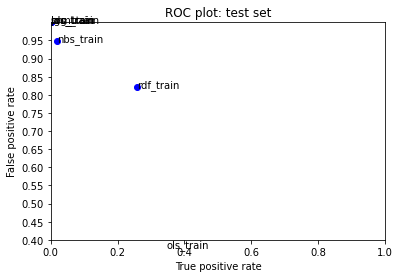

In [22]:
fits = [ols_performance_train, svm_performance_train, lgs_performance_train, nbs_performance_train, prc_performance_train, rdg_performance_train, rdf_performance_train]

fig = plt.subplots(figsize=(6, 4))

for fit in fits:
    plt.plot(fit.performance_measures['FP'] / fit.performance_measures['Neg'], 
             fit.performance_measures['TP'] / fit.performance_measures['Pos'], 'bo')
    plt.text(fit.performance_measures['FP'] / fit.performance_measures['Neg'], 
             fit.performance_measures['TP'] / fit.performance_measures['Pos'], fit.desc)
plt.axis([0, 1, 0.4, 1])
plt.yticks(np.arange(0.4, 1, 0.05))
plt.title('ROC plot: test set')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.show()

### Create Pivot Table

In [54]:
fits = [ols_performance_train, svm_performance_train, lgs_performance_train, nbs_performance_train, prc_performance_train, rdg_performance_train, rdf_performance_train]

TP_rate =[]
FP_rate =[]
rows = ['ordinary least sq','support vector','logistic reg','naive bayes','perceptron','ridge reg','random forest']
for fit in fits:
    FP_rate.append(fit.performance_measures['FP'] / fit.performance_measures['Neg'])
    TP_rate.append(fit.performance_measures['TP'] / fit.performance_measures['Pos'])
    
df = pd.DataFrame({"True Positive Rate":TP_rate, "False Positive Rate": FP_rate, "Rows": rows})
train_table = pd.pivot_table(df, values=["True Positive Rate","False Positive Rate"], index=["Rows"]).sort_values(by=['True Positive Rate'],ascending=False)

column_order=["True Positive Rate","False Positive Rate"]
train_table = train_table.reindex(column_order, axis=1)

print(train_table)

                True Positive Rate  False Positive Rate
Rows                                                   
logistic reg                1.0000               0.0000
ridge reg                   1.0000               0.0000
perceptron                  0.9999               0.0000
support vector              0.9999               0.0000
naive bayes                 0.9491               0.0181
random forest               0.8206               0.2572
ordinary least              0.3807               0.3477


### looking at reviews based on their classification

Let's say we decide that Ordinary Least Squares (OLS) Regression is the best model for generalization. Let's take a look at some of the reviews and try to make a (subjective) determination of whether it's generalizing well. 

In [13]:
ols_predictions = ols.predict(X_train)

### let's look at some false positives:

In [14]:
# false positives

print("Examples of false positives:")

import random, time

for i in range(0, len(ols_predictions)):
    if (ols_predictions[i] == 1):
        if (X_raw_train.iloc[i]['sentiment'] == 0):
            if (random.uniform(0, 1) < 0.05): # to print only 5% of the false positives
                print(i)
                print(X_raw_train.iloc[i]['review'])
                print('* * * * * * * * * ')


Examples of false positives:
6
My wife and I just finished this movie and I came onto to IMDb to commiserate with the reviewers that found this movie less than satisfactory. However, of the 10 pages of reviews, only a handful are negative. I feel that this movie is a great concept gone horribly awry and I want to warn those who are looking to watch the movie into the future.<br /><br />I admit, I'm more inspired to write reviews when I don't like a movie than as to when I do, so my handful of reviews are all negative. Still, that doesn't mean I'm biased towards not enjoying a movie, but I often find more eloquent reviews of movies I do enjoy.<br /><br />Paris je t'aime is the most pretentious movie I've seen in years. By using an \intelligent\" concept and attaching some big talent to a couple of the WAY to many short stories, the movie ends up the worst of all worlds. It is art for arts sake, but something that a 2 year old could dream up and accomplish. Giving the director free reign

3908
I have always been somewhat underwhelmed by Joe Dante's original THE HOWLING (1981)  so I wasn't particularly interested in checking out any of its sequels; some time ago, I did catch HOWLING III: THE MARSUPIALS (1987)  by the same director as this one  and found it to be watchable but nothing special.<br /><br />The second instalment, however, has quite a bad rep and I knew I'd have a good time watching it  if mainly to wallow in the sight of dear but pompous horror icon Christopher Lee squirming in the midst of it all (the gracefully-aged star has pathetically asserted a number of times in interviews that he hasn't appeared in horror-oriented fare since his last picture for Hammer Films back in 1976!). Anyway, this film should have borne the subtitle \Your Movie Is A Turd\"  being astoundingly inept in all departments (beginning with the all-important werewolf make-up)! <br /><br />The plot (and dialogue) is not only terrible, but it has the limpest connection with Dante's 

7920
I'm afraid that you'll find that the huge majority of people who rate this movie as a 10 are highly Christian. I am not. If you are looking for a Christian movie, I recommend this film. If you are looking for a good general movie, I'm afraid you'll need to go elsewhere.<br /><br />I was annoyed by the characters, and their illogical behaviour. The premise of the movie is that the teaching of morality without teaching that it was Jesus who is the basis of morality is itself wrong. One scene shows the main character telling a boy that it is wrong to steal, and then the character goes on to say that it was Jesus who taught us this. I find that offensive: are we to believe that \thou shalt not steal\" came from Jesus? I suppose he wrote the Ten Commandments? And stealing was acceptable before that? I rented the movie from Netflix. I should have realized the nature of the movie from the comments. Oh well."
* * * * * * * * * 
8092
I've finally seen THE INCUBUS after waiting 20 something

11333
let's value it.<br /><br />entertainment: a trashy script which has been typed by unintelligent people in front of typewriters a thousand times.. pathetic acting that is thwarted by the story...OK production value, including good set/location and gorgeous girl.. -rating 4/10 <br /><br />social message: the movie has no social message. it's thought free... .but if I pretend I were 10, and my IQ were 70. I feel the message is:don't be afraid to love? -rating 0/10<br /><br />objectionable things: nothing special, just the mild Jewish hedonic and arrogant attitude that is presented by the writer/director. generally speaking, good , nothing degenerate -8/10<br /><br />overall rating is 4/10
* * * * * * * * * 
11420
A major disappointment. This was one of the best UK crime drama / detective shows from the 90's which developed the fascinating title character played by Scotland's Robbie Coltrane. However this one-off has little to add and perhaps suffers from an inevitable let down due t

14617
Awful, simply awful. It proves my theory about \star power.\" This is supposed to be great TV because the guy who directed (battlestar) Titanica is the same guy who directed this shlop schtock schtick about a chick. B O R I N G.<br /><br />Find something a thousand times more interesting to do - like watch your TV with no picture and no sound. 1/10 (I rated it so high b/c there aren't any negative scores in the IMDb.com rating system.)<br /><br />-Zaphoid<br /><br />PS: My theory about \"star power\" is: the more \"star power\" used in a show, the weaker the show is. (It's called an indirect proportionality: quality 1/\"star power\", less \"sp\" makes for better quality, etc. Another way to look at it is: \"more is less.\")<br /><br />-Z"
* * * * * * * * * 
14632
Carl Panzram lived an amazing life and scribbled down his memoirs on scraps of paper for possibly the only person who ever did anything selfless for him. The book \Panzram: A Journal of Murder\" by Thomas E. Gaddis and J

18068
It's been a looooonnnggg time since I saw this comedy, and I'd forgotten just how idiotic it is. I'd place this easily in the lower two or three of Elvis Presley's very worst movies. Presley plays Joe Whitecloud, a half-breed Indian bull rider who returns home to Arizona and the broken-down shack where his family lives, and where his friends love to party all night long. His parents are played by Burgess Meredith and Katy Jurado, and his old Indian grandpa is Thomas Gomez. None of the three offer anything of substance , comically or otherwise. The government has invested in the family's cattle, but they're lacking a bull. Elvis gets to sing just a few utterly worthless songs, and is pursued by a young boy-crazy gal and her gun-toting mother. This is just a real slapdash of a mess, and the dilapidated surroundings practically stink of manure and don't make this much easier. The one thing that puzzles me, however, is that Elvis actually seems to be having a good time in the film. H

---

# <span style="color:red">WARNING: Don't look at test set performance too much!</span>

---

The following cells show performance on your test set. Do not look at this too often! 

# Look at performance on the test set

### MODEL: ordinary least squares

In [39]:
ols_performance_test = BinaryClassificationPerformance(ols.predict(X_test), y_test, 'ols_test')
ols_performance_test.compute_measures()
print(ols_performance_test.performance_measures)

{'Pos': 2500, 'Neg': 2500, 'TP': 879, 'TN': 1777, 'FP': 723, 'FN': 1621, 'Accuracy': 0.5312, 'Precision': 0.548689138576779, 'Recall': 0.3516, 'desc': 'ols_test'}


### MODEL: SVM, linear

In [25]:
svm_performance_test = BinaryClassificationPerformance(svm.predict(X_test), y_test, 'svm_test')
svm_performance_test.compute_measures()
print(svm_performance_test.performance_measures)

{'Pos': 2500, 'Neg': 2500, 'TP': 2080, 'TN': 2123, 'FP': 377, 'FN': 420, 'Accuracy': 0.8406, 'Precision': 0.8465608465608465, 'Recall': 0.832, 'desc': 'svm_test'}


### MODEL: logistic regression

In [26]:
lgs_performance_test = BinaryClassificationPerformance(lgs.predict(X_test), y_test, 'lgs_test')
lgs_performance_test.compute_measures()
print(lgs_performance_test.performance_measures)

{'Pos': 2500, 'Neg': 2500, 'TP': 2077, 'TN': 2098, 'FP': 402, 'FN': 423, 'Accuracy': 0.835, 'Precision': 0.8378378378378378, 'Recall': 0.8308, 'desc': 'lgs_test'}


### MODEL: Naive Bayes

In [27]:
nbs_performance_test = BinaryClassificationPerformance(nbs.predict(X_test), y_test, 'nbs_test')
nbs_performance_test.compute_measures()
print(nbs_performance_test.performance_measures)

{'Pos': 2500, 'Neg': 2500, 'TP': 1843, 'TN': 1933, 'FP': 567, 'FN': 657, 'Accuracy': 0.7552, 'Precision': 0.7647302904564315, 'Recall': 0.7372, 'desc': 'nbs_test'}


### MODEL: Perceptron

In [28]:
prc_performance_test = BinaryClassificationPerformance(prc.predict(X_test), y_test, 'prc_test')
prc_performance_test.compute_measures()
print(prc_performance_test.performance_measures)

{'Pos': 2500, 'Neg': 2500, 'TP': 2093, 'TN': 2116, 'FP': 384, 'FN': 407, 'Accuracy': 0.8418, 'Precision': 0.8449737585789261, 'Recall': 0.8372, 'desc': 'prc_test'}


### MODEL: Ridge Regression Classifier

In [41]:
rdg_performance_test = BinaryClassificationPerformance(rdg.predict(X_test), y_test, 'rdg_test')
rdg_performance_test.compute_measures()
print(rdg_performance_test.performance_measures)

{'Pos': 2500, 'Neg': 2500, 'TP': 1931, 'TN': 1901, 'FP': 599, 'FN': 569, 'Accuracy': 0.7664, 'Precision': 0.7632411067193676, 'Recall': 0.7724, 'desc': 'rdg_test'}


### MODEL: Random Forest Classifier

In [30]:
rdf_performance_test = BinaryClassificationPerformance(rdf.predict(X_test), y_test, 'rdf_test')
rdf_performance_test.compute_measures()
print(rdf_performance_test.performance_measures)
print(rdf_performance_test)

{'Pos': 2500, 'Neg': 2500, 'TP': 2026, 'TN': 1872, 'FP': 628, 'FN': 474, 'Accuracy': 0.7796, 'Precision': 0.7633760361718162, 'Recall': 0.8104, 'desc': 'rdf_test'}


### ROC plot to compare performance of various models and fits

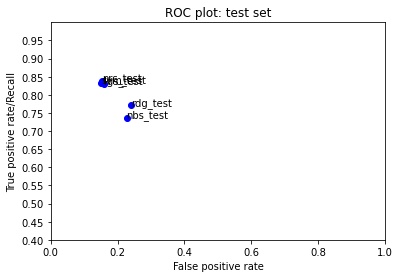

In [53]:
fits = [svm_performance_test, lgs_performance_test, nbs_performance_test, prc_performance_test, rdg_performance_test]
fig = plt.subplots(figsize=(6, 4))

for fit in fits:
    plt.plot(fit.performance_measures['FP'] / fit.performance_measures['Neg'], 
             fit.performance_measures['TP'] / fit.performance_measures['Pos'], 'bo')
    plt.text(fit.performance_measures['FP'] / fit.performance_measures['Neg'], 
             fit.performance_measures['TP'] / fit.performance_measures['Pos'], fit.desc)
plt.axis([0, 1, 0.4, 1])
plt.yticks(np.arange(0.4, 1, 0.05))
plt.title('ROC plot: test set')
plt.ylabel('True positive rate/Recall')
plt.xlabel('False positive rate')
plt.show()

### Create Pivot Table

In [56]:
#https://pavopax.github.io/2017/11/precision-recall/
#https://towardsdatascience.com/what-metrics-should-we-use-on-imbalanced-data-set-precision-recall-roc-e2e79252aeba#:~:text=Recall%20and%20True%20Positive%20Rate,denominator%20contains%20the%20true%20negatives.
fits = [ols_performance_test, svm_performance_test, lgs_performance_test, nbs_performance_test, prc_performance_test, rdg_performance_test, rdf_performance_test]
TP_rate =[]
FP_rate =[]
rows = ['ordinary least sq','support vector','logistic reg','naive bayes','perceptron','ridge reg','random forest']
for fit in fits:
    FP_rate.append(fit.performance_measures['FP'] / fit.performance_measures['Neg'])
    TP_rate.append(fit.performance_measures['TP'] / fit.performance_measures['Pos'])
    
df = pd.DataFrame({"True Positive Rate":TP_rate, "False Positive Rate": FP_rate, "Rows": rows})
test_table = pd.pivot_table(df, values=["True Positive Rate","False Positive Rate"], index=["Rows"]).sort_values(by=['True Positive Rate'],ascending=False)

column_order=["True Positive Rate","False Positive Rate"]
test_table = test_table.reindex(column_order, axis=1)

print(test_table)

                   True Positive Rate  False Positive Rate
Rows                                                      
perceptron                     0.8372               0.1536
support vector                 0.8320               0.1508
logistic reg                   0.8308               0.1608
random forest                  0.8104               0.2512
ridge reg                      0.7724               0.2396
naive bayes                    0.7372               0.2268
ordinary least sq              0.3516               0.2892


---

# <span style="color:red">SUBMISSION</span>

---

In [23]:
# read in test data for submission
# CHANGE FILE PATH and my_random_seed number (any integer other than 74 will do): 
raw_data, X_test_submission = process_raw_data(fn='/home/ec2-user/data/moviereviews_test.tsv', my_random_seed=74, test=True)
print("Number of rows in the submission test set (should be 25,000): ")

movie_data is: <class 'pandas.core.frame.DataFrame'>
movie_data has 25000 rows and 2 columns 

the data types for each of the columns in movie_data:
id        object
review    object
dtype: object 

the first 10 rows in movie_data:
         id                                             review
0  12311_10  Naturally in a film who's main themes are of m...
1    8348_2  This movie is a disaster within a disaster fil...
2    5828_4  All in all, this is a movie for kids. We saw i...
3    7186_2  Afraid of the Dark left me with the impression...
4   12128_7  A very accurate depiction of small time mob li...
Shape of HashingVectorizer X:
(25000, 131072)
Look at a few rows of the new quantitative features: 
   word_count  punc_count
0         131           5
1         169          15
2         176          18
3         112           5
4         133           8
5         331          20
6         121          18
7         230          22
8          59           3
9         224          14
Size

---

Choose a <span style="color:red">*single*</span> model for your submission. In this code, I am choosing the Ordinary Least Squares model fit, which is in the `ols` object. But you should choose the model that is performing the best for you! 

In [24]:
# store the id from the raw data
my_submission = pd.DataFrame(raw_data["id"])
# concatenate predictions to the id
my_submission["prediction"] = ols.predict(X_test_submission)
# look at the proportion of positive predictions
print(my_submission['prediction'].mean())

0.5596


In [25]:
raw_data.head()

,id,review,word_count,punc_count
0,12311_10,Naturally in a film who's main themes are of m...,131,5
1,8348_2,This movie is a disaster within a disaster fil...,169,15
2,5828_4,"All in all, this is a movie for kids. We saw i...",176,18
3,7186_2,Afraid of the Dark left me with the impression...,112,5
4,12128_7,A very accurate depiction of small time mob li...,133,8


In [26]:
my_submission.head()

,id,prediction
0,12311_10,1
1,8348_2,1
2,5828_4,1
3,7186_2,1
4,12128_7,0


In [27]:
my_submission.shape

(25000, 2)

In [28]:
# export submission file as pdf
# CHANGE FILE PATH: 
my_submission.to_csv('/home/ec2-user/data/moviereviews_submission.csv', index=False)

# Submit to Canvas: 1) the CSV file that was written in the previous cell and 2) the url to the repository (GitHub or other) that contains your code and documentation